In [12]:
#1.loading dataset into my notebook

In [56]:
import pandas as pd

In [57]:
loan_data= pd.read_csv("loan.csv")
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
#2.downhere I am going to check for missing values(null)

In [11]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#3.handling missing values categorogical columns and numerical coumns separately

In [70]:
cat_cols =['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in cat_cols:
    loan_data[col].fillna(loan_data[col].mode()[0], inplace =True)

In [84]:
num_cols =['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in num_cols:
    loan_data[col].fillna(loan_data[col].median(), inplace =True)

C:\Users\digab\AppData\Local\Temp\ipykernel_17464\1246131598.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data[col].fillna(loan_data[col].median(), inplace =True)


In [24]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
#4.once i am done with fixing all missing values, let's analyse target columns

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import *

Text(0, 0.5, 'count')

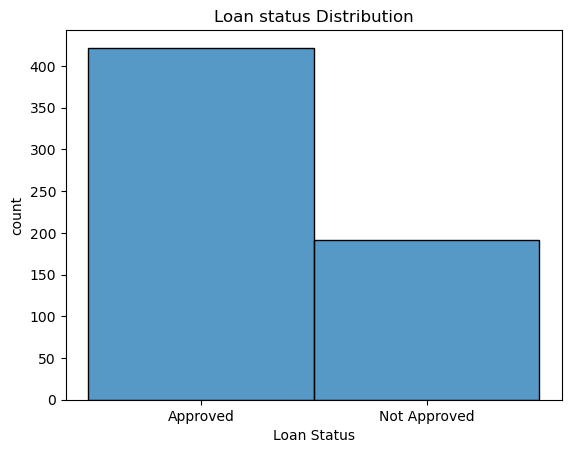

In [92]:
sns.histplot(x='Loan_Status', data=loan_data,)
plt.title("Loan status Distribution")
plt.xticks(['N','Y'], ['Not Approved', 'Approved'])
plt.xlabel("Loan Status")
plt.ylabel("count")

In [88]:
loan_data['Loan_Status'].mode()

0    Y
Name: Loan_Status, dtype: object

Text(0, 0.5, 'Frequency')

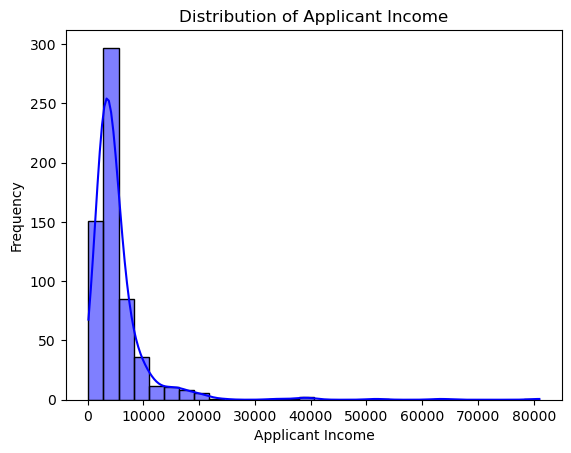

In [93]:
sns.histplot(loan_data['ApplicantIncome'], kde=True, bins=30, color='blue')
plt.title("Distribution of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

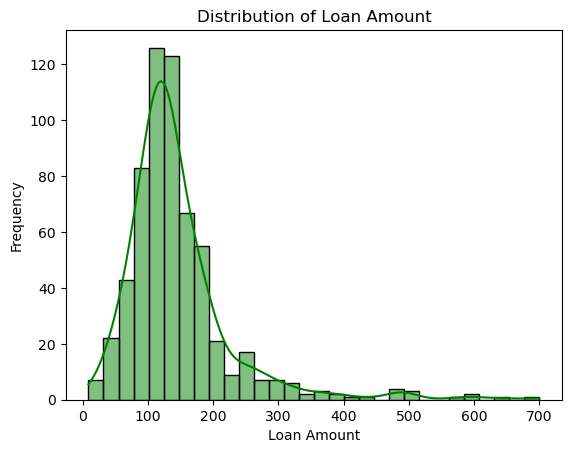

In [94]:
sns.histplot(loan_data['LoanAmount'], kde=True, bins=30, color='green')
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")

In [103]:
#5.once i am done analysing some target columns, it's time to start prediction.
#first, i need to convert this categorogical variables into numerical format by LabelEncoder.
# male=1, female=0 yes=1 no=0, graduate=0 not graduate=1

In [108]:
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *

In [104]:
label_encoder = LabelEncoder()
categorical_features = ['Gender', 'Married', 'Dependents', 'Education',
                        'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_features:
    loan_data[col] = label_encoder.fit_transform(loan_data[col])
loan_data.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,0,1,1,0,0,12000,0.0,496.0,360.0,1.0,1,1
605,LP002960,1,1,0,1,0,2400,3800.0,128.0,180.0,1.0,2,0
606,LP002961,1,1,1,0,0,3400,2500.0,173.0,360.0,1.0,1,1
607,LP002964,1,1,2,1,0,3987,1411.0,157.0,360.0,1.0,0,1
608,LP002974,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


In [107]:
X = loan_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")


Training Set Shape: (491, 11)
Testing Set Shape: (123, 11)


In [114]:
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)
print("\nModel Training Complete!")


Model Training Complete!


In [116]:
y_pred = model.predict(X_test)

print("\nPredictions on Test Set:")
y_pred


Predictions on Test Set:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [117]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)



Accuracy: 78.86%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



Text(70.72222222222221, 0.5, 'Actual')

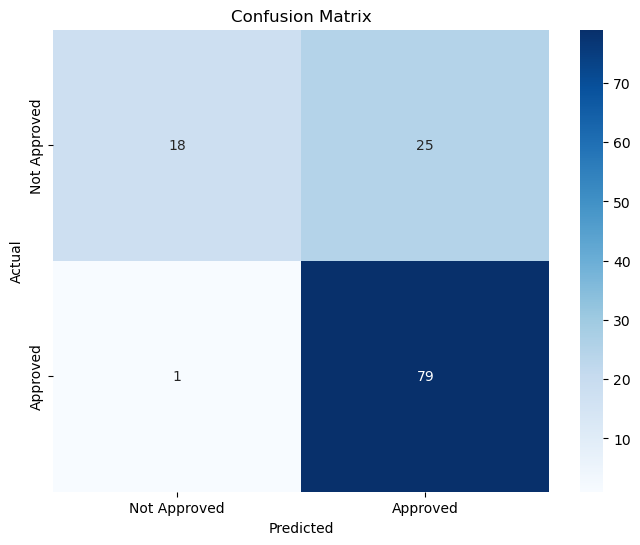

In [118]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")